* https://profoundphysics.com/christoffel-symbols-a-complete-guide-with-examples/
* https://mathworld.wolfram.com/ChristoffelSymboloftheFirstKind.html
* https://ned.ipac.caltech.edu/level5/March01/Carroll3/Carroll8.html
* https://docs.einsteinpy.org/en/stable/_modules/einsteinpy/symbolic/christoffel.html#ChristoffelSymbols
* https://docs.sympy.org/latest/modules/matrices/expressions.html
* https://physics.stackexchange.com/questions/513914/geodesic-equations-of-the-frw-metric-christoffel-symbols
* https://en.wikipedia.org/wiki/Christoffel_symbols

In [1]:
import sympy as sy
import numpy as np
import pandas as pd

sy.init_printing()

In [18]:
t, x, y, z, k, theta, r, alpha, x0, x1, x2, x3 = sy.symbols('t x y z k theta r alpha x_0 x_1 x_2 x_3')
f = sy.Function('f')(x0, x1, x2, x3)
g = sy.Function('g')(x0, x1, x2, x3)
a = sy.Function('a')(x0, x1, x2, x3)
b = sy.Function('b')(x0, x1, x2, x3)
g = sy.diag(-(a**2 - b**2), 1, 1, 1)
g = sy.diag(-1, a**2 / (1 - k*x1**2), a**2*x1**2, a**2*x1**2*sy.sin(x3)**2)
g_inv = g.inv()

In [12]:
v = [x0, x1, x2, x3]
# Define the Christoffel symbols
Gamma = np.empty((4,4,4), dtype=object)
for i in range(4):
    for j in range(4):
        for k in range(4):
            Gamma[k,i,j] = 0.5*(sy.diff(g[k,i], v[j]) + sy.diff(g[k,j], v[i]) - sy.diff(g[i,j], v[k]))

# Gamma2 = np.empty((4,4,4), dtype=object)
# for i in range(4):
#     for j in range(4):
#         for k in range(4):
#             for n in range(4):
#                 Gamma2[k,i,j] += g[k,n] * Gamma[n,i,j]  

$\Gamma _{cab} = \frac {1}{2}\,\left(g_{ca,b}+g_{cb,a}-g_{ab,c}\right)\,.$

$\Gamma ^{a}_{bc} = \frac{1}{2}g^{am}\left(g_{mb,c}+g_{mc,b}-g_{bc,m}\right) = \frac{1}{2}g^{am} \Gamma _{mbc}$

In [69]:
v = [x0, x1, x2, x3]
# Define the Christoffel symbols of the first kind
Gamma_1 = np.empty((4,4,4), dtype=object)
for i in range(4):
    for j in range(4):
        for k in range(4):
                Gamma_1[k,i,j] = (sy.diff(g[k,i], v[j]) + sy.diff(g[k,j], v[i]) - sy.diff(g[i,j], v[k]))/2
# Define the Christoffel symbols of the first kind
Gamma_2 = np.empty((4,4,4), dtype=object)
temp_2 = np.empty((4,4,4), dtype=object)
for i in range(4):
    for j in range(4):
        for k in range(4):
            temp_2[i,j,k] = 0
            for l in range(4):
                temp_2[i,j,k] += g_inv[l,k] * Gamma_1[i,j,l]
                Gamma_2[i,j,k] = Gamma_2[i,j,k] = temp_2[i,j,k]

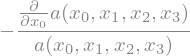

In [70]:
Gamma_2[0,1,1]

In [80]:
# Define the Christoffel symbols of the first kind
Gamma = np.empty((4,4,4), dtype=object)
for i in range(4):
    for j in range(4):
        for k in range(4):
            Gamma[i,j,k] = (1/2)*(sy.diff(g[j,i], v[k]) + 
                                    sy.diff(g[k,i], v[j]) - 
                                    sy.diff(g[j,k], v[i]))
Gamma_up = np.empty((4,4,4), dtype=object)
for i in range(4):
    for j in range(4):
        for k in range(4):
            Gamma_up[i,j,k] = sum([g_inv[i, l]*Gamma[l,j,k] for l in range(4)])

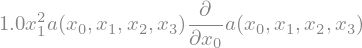

In [83]:
Gamma_up[0,2,2]